In [ ]:
import tensorflow as tf
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sess = tf.Session()

### KASUSNYA ADALAH MENGELOMPOKAN SETOSA ATAU NGGAK (BINARY), SEMENTARA DATASET KITA MEMILIKI 3 CLASS

In [3]:
iris = datasets.load_iris()
binary_target = np.array([1. if x==0 else 0. for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data]) # kita cuma ingin melatih kolom ke-2 dan ke-3 pada data iris

In [62]:
print(iris.target)
print()
print([1 if x == 0 else 0. for x in iris.target])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


#### MEMAHAMI ISI DAN BENTUK DATASET

In [4]:
# apa sih isi ketiganya ?
print('iris \n',iris['data'][:5], '\n') # tampilkan hanya sampe 5 bari dengan 4 atribut default (kolom)
print('binary target \n',binary_target, '\n') # berisi target class
print('iris_2d \n',iris_2d[:5], '\n') # kita hanya mengamil atribut/kolom kedua dan ketiga sebagai placeholder inputannya

# berapa ukurannya ?
print('iris = ',iris['data'].shape, '\n')
print('binary target = ',binary_target.shape, '\n')
print('iris_2d = ',iris_2d.shape, '\n')

iris 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] 

binary target 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.] 

iris_2d 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]] 

iris =  (150, 4) 

binary target =  (150,) 

iris_2d =  (150, 2) 



In [5]:
batch_size = 20 # Tentukan jumlah batch size, nanti ini akan dijadikan inisialisasi index saat forward propagate sebagai array

# inisialisasi variable inputan x1,x2 dan terget, klo placeholder itu, nilainya akan dimasukan ke dalam variabel saat
# sess.run(feed_dict={}) dijalankan

x1_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) 
x2_data = tf.placeholder(shape=[None, 1], dtype=tf.float32) # inisialisasi variable inputan x2
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32) # inisialisasi variable y_target
A = tf.Variable(tf.random_normal(shape=[1,1])) # inisialisasi variable untuk bobot 
b = tf.Variable(tf.random_normal(shape=[1,1])) # inisialisasi variable untuk bias

# perlu diperhatikan bahwa ukuran atau shape itu sangat penting. harus perhatikan shapenya.
# None pada shape itu maksudnya kita bisa memasukan nilai berapa saja nanti, dengan kondisi di awal kita nggak 
# tahu berapa nilai yang kita mau masukan

In [6]:
# sebelum memulai operasi computation graph (tensor flowing), maka wajib yang namanya menjalankan/
# menginisialisasi variable seperti di bawah ini
init = tf.global_variables_initializer()
sess.run(init)

In [7]:
my_mult = tf.matmul(x2_data, A) # operasi matrix multiplication antara placeholder x2_data dengan variable A
my_add = tf.add(my_mult, b)  # hasil dari matrix multiplication tadi akan ditambahkan dengan variable bias (b)
my_output = tf.subtract(x1_data, my_add) # hasil penjumlahan itu akan dikurangkan dengan placeholder x1_data

In [8]:
# Menggunakan loss function sigmoid cross entropy with logits
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits=my_output, labels=y_target)

In [9]:
# mengatur hyperparameter untuk keperluan perbaikan nilai bobot dan loss
# gradientdescen untuk mengatasi dan mengecilkan error loss yang dihasilkan terhadap target
my_optim = tf.train.GradientDescentOptimizer(0.05)
# menyiapkan optimizer untuk memulai proses backpropagation
optim_step = my_optim.minimize(xentropy)

In [10]:
# memulai training
for i in range(1000): # 1000 looping atau perulangan
    index_rand = np.random.choice(len(iris_2d), size=batch_size) # mengenerate array bertipe int sebanyak jumlah batch sizenya dengan rentang data panjang dari iris_2d
    rand_x = iris_2d[index_rand] # memanggil index dari iris_2d agar disimpan ke variable rand_x
    rand_x1 = np.array([ [x[0] ] for x in rand_x ]) # generate data array dari rand_x
    rand_x2 = np.array([ [x[1] ] for x in rand_x ]) # generate data array dari rand_x
    rand_y = np.array([ [y] for y in binary_target[ index_rand ]]) # geerate data dari data binary_target di atas
    sess.run(optim_step, feed_dict={x1_data : rand_x1, x2_data : rand_x2, y_target : rand_y}) # start bacpropogate
    if (i+1)%200 == 0 : # kita mau tampilkan iterasi setiap looping ke 200
        # tampilkan nilai variable A dan nilai dari bias
        print('step # '+str(i+1)+', A = '+str(sess.run(A)) + ' , b = ' + str(sess.run(b)))

step # 200, A = [[8.51893]] , b = [[-3.520293]]
step # 400, A = [[10.119286]] , b = [[-4.6518483]]
step # 600, A = [[11.094096]] , b = [[-5.3467336]]
step # 800, A = [[11.8139925]] , b = [[-5.9084077]]
step # 1000, A = [[12.358901]] , b = [[-6.38801]]


In [14]:
# membuat garis slope atau miring untuk memisahkan kedua jenis iris
[[slope]] = sess.run(A)
[[intercept]] = sess.run(b)
x = np.linspace(0, 3, num=50) # generate angka dari 0 sampai 3 sebanyak 50
ablineValues = [] # siapkan array untuk menampung dari slope dan intercept
for i in x:
    ablineValues.append(slope * i + intercept)

In [18]:
print(ablineValues)

[-6.388010025024414, -5.631342615400042, -4.87467520577567, -4.118007796151298, -3.3613403865269254, -2.604672976902553, -1.8480055672781814, -1.0913381576538086, -0.33467074802943664, 0.4219966615949353, 1.1786640712193082, 1.9353314808436792, 2.691998890468051, 3.448666300092425, 4.205333709716797, 4.962001119341169, 5.718668528965541, 6.4753359385899145, 7.232003348214285, 7.988670757838657, 8.74533816746303, 9.5020055770874, 10.258672986711773, 11.015340396336146, 11.772007805960516, 12.52867521558489, 13.285342625209264, 14.042010034833638, 14.798677444458008, 15.555344854082378, 16.31201226370675, 17.068679673331122, 17.825347082955496, 18.582014492579866, 19.338681902204243, 20.095349311828613, 20.852016721452983, 21.608684131077357, 22.365351540701727, 23.122018950326098, 23.878686359950475, 24.635353769574845, 25.392021179199215, 26.14868858882359, 26.90535599844796, 27.66202340807233, 28.418690817696707, 29.175358227321077, 29.932025636945447, 30.688693046569824]


In [20]:
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]

In [46]:
np.array([a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1])

array([0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1,
       0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2,
       0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.1, 0.2, 0.2, 0.1, 0.2,
       0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2])

In [35]:
print('isi iris2d : \n', iris_2d[:5], '\n')
print('setosa_x      : ', setosa_x[:5])
print('setosa_y      : ', setosa_y[:5])
print('non_setosa_x  : ', non_setosa_x[:5])
print('non_setosa_y  : ', non_setosa_y[:5])
print()
print('binary target : ',binary_target[:5])

isi iris2d : 
 [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]] 

setosa_x      :  [0.2, 0.2, 0.2, 0.2, 0.2]
setosa_y      :  [1.4, 1.4, 1.3, 1.5, 1.4]
non_setosa_x  :  [1.4, 1.5, 1.5, 1.3, 1.5]
non_setosa_y  :  [4.7, 4.5, 4.9, 4.0, 4.6]

binary target :  [1. 1. 1. 1. 1.]


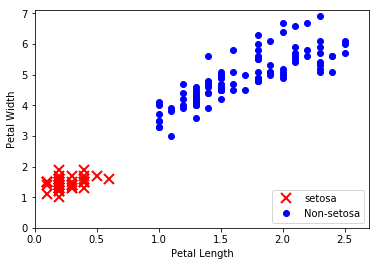

In [21]:
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa''')
plt.plot(non_setosa_x, non_setosa_y, 'bo', label='Non-setosa')
# plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
# plt.suptitle('Linear', Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()

### EVALUATING THE MODEL